In [1]:
import xgboost as xgb
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
import warnings
warnings.filterwarnings('ignore')

C:\Programs\anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
X_with_columns = pd.read_pickle("../pickle_files/X.pkl")
Z_with_columns = pd.read_pickle("../pickle_files/Z.pkl")

columns_to_drop = []

X_with_columns.drop(columns_to_drop, axis = 1, inplace=True)
Z_with_columns.drop(columns_to_drop, axis = 1, inplace=True)

X = np.array(X_with_columns)
Y = np.array(pd.read_pickle("../pickle_files/Y.pkl"))
Z = np.array(Z_with_columns)
df_next_games = pd.read_pickle("../pickle_files/next_games.pkl")

In [3]:
kf = KFold(n_splits=4, random_state=0, shuffle=True)
kf.get_n_splits(X)

4

In [4]:
for train_index, test_index in kf.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = Y[train_index], Y[test_index]

TRAIN: [  0   3   4   6   7   9  11  12  13  15  16  17  19  20  21  22  23  24
  25  26  28  29  32  33  35  36  37  38  41  42  43  44  46  47  48  49
  51  52  53  56  57  58  59  61  63  64  65  66  67  69  70  71  72  73
  74  76  78  80  81  82  83  84  86  87  88  89  90  91  92  93  94  95
  96  98  99 100 102 104 105 106 107 108 109 110 111 112 114 115 116 117
 118 119 120 121 123 124 125 126 127 128 129 130 131 132 133 134 135 136
 137 138 139 143 146 147 148 149 151 152 153 155 157 159 160 161 163 164
 165 166 168 169 170 171 173 174 176 177 178 179 180 182 183 184 185 186
 187 188 189 190 191 192 194 195 197 198 199 201 203 205 206 207 208 209
 210 211 212 213 216 217 218 219 220 221 223 224 225 226 227 228 229 232
 233 234 235 237 238 241 242 243 244 245 246 248 250 254 256 257 259 260
 265 267 268 269 270 271 273 274 275 276 277 278 280 281 282 284 286 287
 288 289 290 291 292 295 296 297 298 300 302 303 304 305 307 308 309 313
 314 315 317 318 319 321 322 323 324 325 326

## XGBoost

In [6]:
XGB_model = xgb.XGBClassifier(silent=False, 
                      learning_rate=0.005,  
                      colsample_bytree = 0.5,
                      subsample = 0.8,
                      objective='multi:softprob', 
                      n_estimators=1000, 
                      reg_alpha = 60,
                      reg_lambda = .6,
                      max_depth=5, 
                      max_delta_step=3,
                      gamma=5,
                      seed=82)

XGB_model = xgb.XGBClassifier(
     learning_rate =0.1,
     n_estimators=1000,
     max_depth=7,
     min_child_weight=3,
     gamma=0.2,
     subsample=0.9,  #0.2
     colsample_bytree=0.7,
     reg_alpha=0.01,
     objective= 'binary:logistic',
     nthread=4,
     scale_pos_weight=1,
     seed=42)


# add max_delta_step=3  to handle imbalanced class with draws
# max depth was 5. I changed to 4.

In [7]:
eval_set = [(X_train, y_train), (X_test, y_test)]

XGB_model.fit(X_train, y_train, eval_metric=["merror", "mlogloss"], eval_set=eval_set, verbose=True)
y_pred = XGB_model.predict(X_test)
y_pred_train = XGB_model.predict(X_train)
accuracy = accuracy_score(y_test, y_pred)
accuracy_train = accuracy_score(y_train, y_pred_train)

[00:45:31] WARNING: ..\src\learner.cc:576: 
Parameters: { "scale_pos_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation_0-merror:0.00000	validation_0-mlogloss:0.96293	validation_1-merror:0.00459	validation_1-mlogloss:0.96758
[1]	validation_0-merror:0.00000	validation_0-mlogloss:0.84329	validation_1-merror:0.00000	validation_1-mlogloss:0.84760
[2]	validation_0-merror:0.00000	validation_0-mlogloss:0.74248	validation_1-merror:0.00000	validation_1-mlogloss:0.74646
[3]	validation_0-merror:0.00000	validation_0-mlogloss:0.65646	validation_1-merror:0.00000	validation_1-mlogloss:0.66014
[4]	validation_0-merror:0.00000	validation_0-mlogloss:0.58234	validation_1-merror:0.00000	validation_1-mlogloss:0.58573
[5]	validation_0-merror:0.00000	v

[65]	validation_0-merror:0.00000	validation_0-mlogloss:0.00733	validation_1-merror:0.00000	validation_1-mlogloss:0.00796
[66]	validation_0-merror:0.00000	validation_0-mlogloss:0.00732	validation_1-merror:0.00000	validation_1-mlogloss:0.00795
[67]	validation_0-merror:0.00000	validation_0-mlogloss:0.00731	validation_1-merror:0.00000	validation_1-mlogloss:0.00795
[68]	validation_0-merror:0.00000	validation_0-mlogloss:0.00731	validation_1-merror:0.00000	validation_1-mlogloss:0.00795
[69]	validation_0-merror:0.00000	validation_0-mlogloss:0.00730	validation_1-merror:0.00000	validation_1-mlogloss:0.00795
[70]	validation_0-merror:0.00000	validation_0-mlogloss:0.00729	validation_1-merror:0.00000	validation_1-mlogloss:0.00795
[71]	validation_0-merror:0.00000	validation_0-mlogloss:0.00725	validation_1-merror:0.00000	validation_1-mlogloss:0.00791
[72]	validation_0-merror:0.00000	validation_0-mlogloss:0.00724	validation_1-merror:0.00000	validation_1-mlogloss:0.00791
[73]	validation_0-merror:0.00000

[133]	validation_0-merror:0.00000	validation_0-mlogloss:0.00721	validation_1-merror:0.00000	validation_1-mlogloss:0.00796
[134]	validation_0-merror:0.00000	validation_0-mlogloss:0.00721	validation_1-merror:0.00000	validation_1-mlogloss:0.00796
[135]	validation_0-merror:0.00000	validation_0-mlogloss:0.00721	validation_1-merror:0.00000	validation_1-mlogloss:0.00796
[136]	validation_0-merror:0.00000	validation_0-mlogloss:0.00721	validation_1-merror:0.00000	validation_1-mlogloss:0.00796
[137]	validation_0-merror:0.00000	validation_0-mlogloss:0.00721	validation_1-merror:0.00000	validation_1-mlogloss:0.00796
[138]	validation_0-merror:0.00000	validation_0-mlogloss:0.00721	validation_1-merror:0.00000	validation_1-mlogloss:0.00796
[139]	validation_0-merror:0.00000	validation_0-mlogloss:0.00721	validation_1-merror:0.00000	validation_1-mlogloss:0.00796
[140]	validation_0-merror:0.00000	validation_0-mlogloss:0.00721	validation_1-merror:0.00000	validation_1-mlogloss:0.00796
[141]	validation_0-merro

[201]	validation_0-merror:0.00000	validation_0-mlogloss:0.00702	validation_1-merror:0.00000	validation_1-mlogloss:0.00776
[202]	validation_0-merror:0.00000	validation_0-mlogloss:0.00702	validation_1-merror:0.00000	validation_1-mlogloss:0.00776
[203]	validation_0-merror:0.00000	validation_0-mlogloss:0.00702	validation_1-merror:0.00000	validation_1-mlogloss:0.00776
[204]	validation_0-merror:0.00000	validation_0-mlogloss:0.00702	validation_1-merror:0.00000	validation_1-mlogloss:0.00776
[205]	validation_0-merror:0.00000	validation_0-mlogloss:0.00702	validation_1-merror:0.00000	validation_1-mlogloss:0.00776
[206]	validation_0-merror:0.00000	validation_0-mlogloss:0.00702	validation_1-merror:0.00000	validation_1-mlogloss:0.00776
[207]	validation_0-merror:0.00000	validation_0-mlogloss:0.00702	validation_1-merror:0.00000	validation_1-mlogloss:0.00776
[208]	validation_0-merror:0.00000	validation_0-mlogloss:0.00702	validation_1-merror:0.00000	validation_1-mlogloss:0.00776
[209]	validation_0-merro

[269]	validation_0-merror:0.00000	validation_0-mlogloss:0.00702	validation_1-merror:0.00000	validation_1-mlogloss:0.00776
[270]	validation_0-merror:0.00000	validation_0-mlogloss:0.00702	validation_1-merror:0.00000	validation_1-mlogloss:0.00776
[271]	validation_0-merror:0.00000	validation_0-mlogloss:0.00702	validation_1-merror:0.00000	validation_1-mlogloss:0.00776
[272]	validation_0-merror:0.00000	validation_0-mlogloss:0.00702	validation_1-merror:0.00000	validation_1-mlogloss:0.00776
[273]	validation_0-merror:0.00000	validation_0-mlogloss:0.00702	validation_1-merror:0.00000	validation_1-mlogloss:0.00776
[274]	validation_0-merror:0.00000	validation_0-mlogloss:0.00702	validation_1-merror:0.00000	validation_1-mlogloss:0.00776
[275]	validation_0-merror:0.00000	validation_0-mlogloss:0.00702	validation_1-merror:0.00000	validation_1-mlogloss:0.00776
[276]	validation_0-merror:0.00000	validation_0-mlogloss:0.00702	validation_1-merror:0.00000	validation_1-mlogloss:0.00776
[277]	validation_0-merro

[337]	validation_0-merror:0.00000	validation_0-mlogloss:0.00702	validation_1-merror:0.00000	validation_1-mlogloss:0.00776
[338]	validation_0-merror:0.00000	validation_0-mlogloss:0.00702	validation_1-merror:0.00000	validation_1-mlogloss:0.00776
[339]	validation_0-merror:0.00000	validation_0-mlogloss:0.00702	validation_1-merror:0.00000	validation_1-mlogloss:0.00776
[340]	validation_0-merror:0.00000	validation_0-mlogloss:0.00702	validation_1-merror:0.00000	validation_1-mlogloss:0.00776
[341]	validation_0-merror:0.00000	validation_0-mlogloss:0.00702	validation_1-merror:0.00000	validation_1-mlogloss:0.00776
[342]	validation_0-merror:0.00000	validation_0-mlogloss:0.00702	validation_1-merror:0.00000	validation_1-mlogloss:0.00776
[343]	validation_0-merror:0.00000	validation_0-mlogloss:0.00702	validation_1-merror:0.00000	validation_1-mlogloss:0.00775
[344]	validation_0-merror:0.00000	validation_0-mlogloss:0.00702	validation_1-merror:0.00000	validation_1-mlogloss:0.00775
[345]	validation_0-merro

[405]	validation_0-merror:0.00000	validation_0-mlogloss:0.00702	validation_1-merror:0.00000	validation_1-mlogloss:0.00776
[406]	validation_0-merror:0.00000	validation_0-mlogloss:0.00702	validation_1-merror:0.00000	validation_1-mlogloss:0.00776
[407]	validation_0-merror:0.00000	validation_0-mlogloss:0.00702	validation_1-merror:0.00000	validation_1-mlogloss:0.00776
[408]	validation_0-merror:0.00000	validation_0-mlogloss:0.00702	validation_1-merror:0.00000	validation_1-mlogloss:0.00776
[409]	validation_0-merror:0.00000	validation_0-mlogloss:0.00702	validation_1-merror:0.00000	validation_1-mlogloss:0.00776
[410]	validation_0-merror:0.00000	validation_0-mlogloss:0.00702	validation_1-merror:0.00000	validation_1-mlogloss:0.00776
[411]	validation_0-merror:0.00000	validation_0-mlogloss:0.00702	validation_1-merror:0.00000	validation_1-mlogloss:0.00776
[412]	validation_0-merror:0.00000	validation_0-mlogloss:0.00702	validation_1-merror:0.00000	validation_1-mlogloss:0.00776
[413]	validation_0-merro

[473]	validation_0-merror:0.00000	validation_0-mlogloss:0.00702	validation_1-merror:0.00000	validation_1-mlogloss:0.00775
[474]	validation_0-merror:0.00000	validation_0-mlogloss:0.00702	validation_1-merror:0.00000	validation_1-mlogloss:0.00775
[475]	validation_0-merror:0.00000	validation_0-mlogloss:0.00702	validation_1-merror:0.00000	validation_1-mlogloss:0.00775
[476]	validation_0-merror:0.00000	validation_0-mlogloss:0.00702	validation_1-merror:0.00000	validation_1-mlogloss:0.00775
[477]	validation_0-merror:0.00000	validation_0-mlogloss:0.00702	validation_1-merror:0.00000	validation_1-mlogloss:0.00775
[478]	validation_0-merror:0.00000	validation_0-mlogloss:0.00702	validation_1-merror:0.00000	validation_1-mlogloss:0.00775
[479]	validation_0-merror:0.00000	validation_0-mlogloss:0.00702	validation_1-merror:0.00000	validation_1-mlogloss:0.00775
[480]	validation_0-merror:0.00000	validation_0-mlogloss:0.00702	validation_1-merror:0.00000	validation_1-mlogloss:0.00775
[481]	validation_0-merro

[541]	validation_0-merror:0.00000	validation_0-mlogloss:0.00702	validation_1-merror:0.00000	validation_1-mlogloss:0.00776
[542]	validation_0-merror:0.00000	validation_0-mlogloss:0.00702	validation_1-merror:0.00000	validation_1-mlogloss:0.00776
[543]	validation_0-merror:0.00000	validation_0-mlogloss:0.00702	validation_1-merror:0.00000	validation_1-mlogloss:0.00776
[544]	validation_0-merror:0.00000	validation_0-mlogloss:0.00702	validation_1-merror:0.00000	validation_1-mlogloss:0.00776
[545]	validation_0-merror:0.00000	validation_0-mlogloss:0.00702	validation_1-merror:0.00000	validation_1-mlogloss:0.00776
[546]	validation_0-merror:0.00000	validation_0-mlogloss:0.00702	validation_1-merror:0.00000	validation_1-mlogloss:0.00776
[547]	validation_0-merror:0.00000	validation_0-mlogloss:0.00702	validation_1-merror:0.00000	validation_1-mlogloss:0.00776
[548]	validation_0-merror:0.00000	validation_0-mlogloss:0.00702	validation_1-merror:0.00000	validation_1-mlogloss:0.00776
[549]	validation_0-merro

[609]	validation_0-merror:0.00000	validation_0-mlogloss:0.00702	validation_1-merror:0.00000	validation_1-mlogloss:0.00776
[610]	validation_0-merror:0.00000	validation_0-mlogloss:0.00702	validation_1-merror:0.00000	validation_1-mlogloss:0.00776
[611]	validation_0-merror:0.00000	validation_0-mlogloss:0.00702	validation_1-merror:0.00000	validation_1-mlogloss:0.00776
[612]	validation_0-merror:0.00000	validation_0-mlogloss:0.00702	validation_1-merror:0.00000	validation_1-mlogloss:0.00776
[613]	validation_0-merror:0.00000	validation_0-mlogloss:0.00702	validation_1-merror:0.00000	validation_1-mlogloss:0.00776
[614]	validation_0-merror:0.00000	validation_0-mlogloss:0.00702	validation_1-merror:0.00000	validation_1-mlogloss:0.00776
[615]	validation_0-merror:0.00000	validation_0-mlogloss:0.00702	validation_1-merror:0.00000	validation_1-mlogloss:0.00776
[616]	validation_0-merror:0.00000	validation_0-mlogloss:0.00702	validation_1-merror:0.00000	validation_1-mlogloss:0.00776
[617]	validation_0-merro

[677]	validation_0-merror:0.00000	validation_0-mlogloss:0.00702	validation_1-merror:0.00000	validation_1-mlogloss:0.00775
[678]	validation_0-merror:0.00000	validation_0-mlogloss:0.00702	validation_1-merror:0.00000	validation_1-mlogloss:0.00775
[679]	validation_0-merror:0.00000	validation_0-mlogloss:0.00702	validation_1-merror:0.00000	validation_1-mlogloss:0.00775
[680]	validation_0-merror:0.00000	validation_0-mlogloss:0.00702	validation_1-merror:0.00000	validation_1-mlogloss:0.00775
[681]	validation_0-merror:0.00000	validation_0-mlogloss:0.00702	validation_1-merror:0.00000	validation_1-mlogloss:0.00775
[682]	validation_0-merror:0.00000	validation_0-mlogloss:0.00702	validation_1-merror:0.00000	validation_1-mlogloss:0.00775
[683]	validation_0-merror:0.00000	validation_0-mlogloss:0.00702	validation_1-merror:0.00000	validation_1-mlogloss:0.00775
[684]	validation_0-merror:0.00000	validation_0-mlogloss:0.00702	validation_1-merror:0.00000	validation_1-mlogloss:0.00775
[685]	validation_0-merro

[745]	validation_0-merror:0.00000	validation_0-mlogloss:0.00702	validation_1-merror:0.00000	validation_1-mlogloss:0.00776
[746]	validation_0-merror:0.00000	validation_0-mlogloss:0.00702	validation_1-merror:0.00000	validation_1-mlogloss:0.00776
[747]	validation_0-merror:0.00000	validation_0-mlogloss:0.00702	validation_1-merror:0.00000	validation_1-mlogloss:0.00776
[748]	validation_0-merror:0.00000	validation_0-mlogloss:0.00702	validation_1-merror:0.00000	validation_1-mlogloss:0.00776
[749]	validation_0-merror:0.00000	validation_0-mlogloss:0.00702	validation_1-merror:0.00000	validation_1-mlogloss:0.00776
[750]	validation_0-merror:0.00000	validation_0-mlogloss:0.00702	validation_1-merror:0.00000	validation_1-mlogloss:0.00776
[751]	validation_0-merror:0.00000	validation_0-mlogloss:0.00702	validation_1-merror:0.00000	validation_1-mlogloss:0.00776
[752]	validation_0-merror:0.00000	validation_0-mlogloss:0.00702	validation_1-merror:0.00000	validation_1-mlogloss:0.00776
[753]	validation_0-merro

[813]	validation_0-merror:0.00000	validation_0-mlogloss:0.00702	validation_1-merror:0.00000	validation_1-mlogloss:0.00776
[814]	validation_0-merror:0.00000	validation_0-mlogloss:0.00702	validation_1-merror:0.00000	validation_1-mlogloss:0.00776
[815]	validation_0-merror:0.00000	validation_0-mlogloss:0.00702	validation_1-merror:0.00000	validation_1-mlogloss:0.00776
[816]	validation_0-merror:0.00000	validation_0-mlogloss:0.00702	validation_1-merror:0.00000	validation_1-mlogloss:0.00776
[817]	validation_0-merror:0.00000	validation_0-mlogloss:0.00702	validation_1-merror:0.00000	validation_1-mlogloss:0.00776
[818]	validation_0-merror:0.00000	validation_0-mlogloss:0.00702	validation_1-merror:0.00000	validation_1-mlogloss:0.00776
[819]	validation_0-merror:0.00000	validation_0-mlogloss:0.00702	validation_1-merror:0.00000	validation_1-mlogloss:0.00776
[820]	validation_0-merror:0.00000	validation_0-mlogloss:0.00702	validation_1-merror:0.00000	validation_1-mlogloss:0.00776
[821]	validation_0-merro

[881]	validation_0-merror:0.00000	validation_0-mlogloss:0.00702	validation_1-merror:0.00000	validation_1-mlogloss:0.00776
[882]	validation_0-merror:0.00000	validation_0-mlogloss:0.00702	validation_1-merror:0.00000	validation_1-mlogloss:0.00776
[883]	validation_0-merror:0.00000	validation_0-mlogloss:0.00702	validation_1-merror:0.00000	validation_1-mlogloss:0.00776
[884]	validation_0-merror:0.00000	validation_0-mlogloss:0.00702	validation_1-merror:0.00000	validation_1-mlogloss:0.00775
[885]	validation_0-merror:0.00000	validation_0-mlogloss:0.00702	validation_1-merror:0.00000	validation_1-mlogloss:0.00775
[886]	validation_0-merror:0.00000	validation_0-mlogloss:0.00702	validation_1-merror:0.00000	validation_1-mlogloss:0.00776
[887]	validation_0-merror:0.00000	validation_0-mlogloss:0.00702	validation_1-merror:0.00000	validation_1-mlogloss:0.00776
[888]	validation_0-merror:0.00000	validation_0-mlogloss:0.00702	validation_1-merror:0.00000	validation_1-mlogloss:0.00776
[889]	validation_0-merro

[949]	validation_0-merror:0.00000	validation_0-mlogloss:0.00702	validation_1-merror:0.00000	validation_1-mlogloss:0.00775
[950]	validation_0-merror:0.00000	validation_0-mlogloss:0.00702	validation_1-merror:0.00000	validation_1-mlogloss:0.00775
[951]	validation_0-merror:0.00000	validation_0-mlogloss:0.00702	validation_1-merror:0.00000	validation_1-mlogloss:0.00775
[952]	validation_0-merror:0.00000	validation_0-mlogloss:0.00702	validation_1-merror:0.00000	validation_1-mlogloss:0.00775
[953]	validation_0-merror:0.00000	validation_0-mlogloss:0.00702	validation_1-merror:0.00000	validation_1-mlogloss:0.00775
[954]	validation_0-merror:0.00000	validation_0-mlogloss:0.00702	validation_1-merror:0.00000	validation_1-mlogloss:0.00776
[955]	validation_0-merror:0.00000	validation_0-mlogloss:0.00702	validation_1-merror:0.00000	validation_1-mlogloss:0.00776
[956]	validation_0-merror:0.00000	validation_0-mlogloss:0.00702	validation_1-merror:0.00000	validation_1-mlogloss:0.00775
[957]	validation_0-merro

In [8]:
y_pred.shape

(218,)

In [9]:
pd.Series(y_pred).value_counts()

3.0    102
1.0     95
2.0     21
dtype: int64

## LogisticRegression

In [10]:
LR = LogisticRegression(random_state = 42)
LR.fit(X_train, y_train)
LR_y_pred = LR.predict(X_test)
LR_y_pred_train = LR.predict(X_train)
LR_accuracy = accuracy_score(y_test, LR_y_pred)
LR_accuracy_train = accuracy_score(y_train, LR_y_pred_train)

In [11]:
pd.Series(LR_y_pred).value_counts()

3.0    116
1.0    102
dtype: int64

## Comparison

In [12]:
print("XGB train Accuracy: %.2f%%" % (accuracy_train * 100.0))
print("XGB Accuracy: %.2f%%" % (accuracy * 100.0))
print("LR train Accuracy: %.2f%%" % (LR_accuracy_train * 100.0))
print("LR Accuracy: %.2f%%" % (LR_accuracy * 100.0))

XGB train Accuracy: 100.00%
XGB Accuracy: 100.00%
LR train Accuracy: 90.08%
LR Accuracy: 87.16%


In [13]:
features_names = list(X_with_columns.columns)

In [14]:
importance = np.round(XGB_model.feature_importances_,4)
dictionary = dict(zip(features_names, importance))
sorted_dictionary=sorted(dictionary.items(), key=lambda x:x[1], reverse=True)
names=[]
values=[]
for i in range(0, len(importance)):
    print('Feature Importance: {:35} {}%'.format(
        sorted_dictionary[i][0], np.round(sorted_dictionary[i][1]*100,4))
         )
    names.append(sorted_dictionary[i][0])
    values.append(np.round(sorted_dictionary[i][1]*100,4))

Feature Importance: ATGDIFF                             36.09%
Feature Importance: HTGDIFF                             29.04%
Feature Importance: awayTeamScore.minutesInFront        18.47%
Feature Importance: homeTeamScoreChart.goals            5.14%
Feature Importance: homeTeamScore.matchScore.totalScore 3.57%
Feature Importance: awayTeamScore.matchScore.totalScore 3.14%
Feature Importance: homeTeamScore.minutesInFront        1.92%
Feature Importance: awayTeamScoreChart.goals            1.84%
Feature Importance: AVGHTGDIFF                          0.48%
Feature Importance: round.year                          0.32%


In [15]:
cum_values = np.cumsum(values)
values_over_95 = (cum_values > 95).sum()
columns_over_95 = names[-values_over_95:]
columns_over_95

['awayTeamScore.matchScore.totalScore',
 'homeTeamScore.minutesInFront',
 'awayTeamScoreChart.goals',
 'AVGHTGDIFF',
 'round.year']

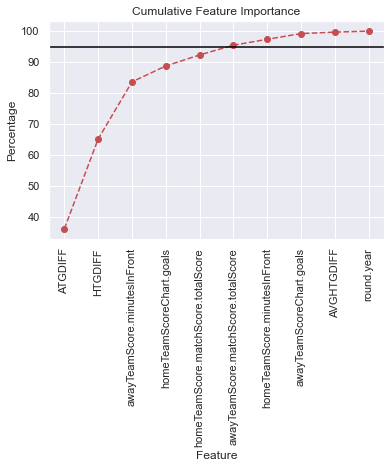

In [16]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
#bottom, top = ylim()
bottom = 0
plt.plot(names,cum_values, '--bo', color='r')
# set importance at 95%
plt.axhline(95,color='black')
plt.xticks(rotation=90);
plt.xlabel('Feature'); 
plt.ylabel('Percentage'); 
plt.title('Cumulative Feature Importance');

In [17]:
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(y_true, y_pred, classes, labels,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    # Only use the labels that appear in the data
    #classes = classes[unique_labels(y_true, y_pred)]
    classes=classes
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    #plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             #rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

Normalized confusion matrix
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


<AxesSubplot:title={'center':'Confusion matrix, with normalization'}, xlabel='Predicted label', ylabel='True label'>

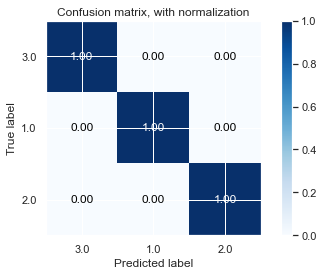

In [18]:
# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=pd.Series(Y).unique(), labels=pd.Series(Y).unique(),
                      title='Confusion matrix, with normalization', normalize=True)

In [19]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

def learning_curve(preds,y_test, model):
    predictions = [round(value) for value in preds]
    # evaluate predictions
    accuracy = accuracy_score(y_test, predictions)
    print("Accuracy: %.2f%%" % (accuracy * 100.0))
    # retrieve performance metrics
    results = model.evals_result()
    epochs = len(results['validation_0']['merror'])
    x_axis = range(0, epochs)
    # plot log loss
    fig, ax = plt.subplots()
    ax.plot(x_axis, results['validation_0']['merror'], label='Train')
    ax.plot(x_axis, results['validation_1']['merror'], label='Test')
    ax.legend()
    plt.ylabel('Log Loss')
    plt.title('XGBoost Log Loss')
    plt.show()
    # plot classification error
    fig, ax = plt.subplots()
    ax.plot(x_axis, results['validation_0']['merror'], label='Train')
    ax.plot(x_axis, results['validation_1']['merror'], label='Test')
    ax.legend()
    plt.ylabel('Classification Error')
    plt.title('XGBoost Classification Error')
    plt.show()

Accuracy: 100.00%


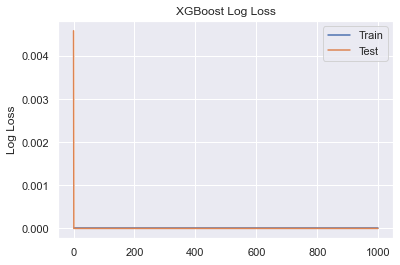

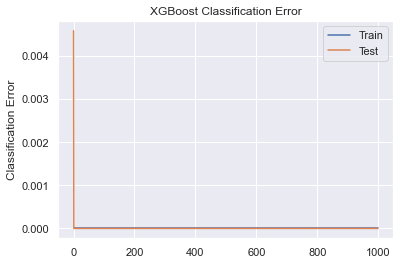

In [20]:
learning_curve(y_pred,y_test,XGB_model)

## Predict Result for Next Games

In [21]:
z_pred = XGB_model.predict(Z)

In [22]:
xgb_df_next_games = df_next_games.copy()

In [23]:
xgb_df_next_games['predicted_result'] = z_pred

In [24]:
xgb_df_next_games

,match.homeTeam.name,match.awayTeam.name,predicted_result
90,Sydney Swans,Richmond,1.0
91,Brisbane Lions,GWS Giants,3.0
92,Geelong Cats,Adelaide Crows,3.0
93,Melbourne,Fremantle,3.0
94,West Coast Eagles,Western Bulldogs,3.0
95,Gold Coast Suns,Hawthorn,3.0
96,St Kilda,North Melbourne,1.0
97,Collingwood,Carlton,1.0
98,Port Adelaide,Essendon,3.0


In [25]:
 z_pred_prob = XGB_model.predict_proba(Z)

In [26]:
xgb_df_next_games['prob_loss'] = z_pred_prob[:,0]
xgb_df_next_games['prob_draw'] = z_pred_prob[:,1]
xgb_df_next_games['prob_win'] = z_pred_prob[:,2]




In [27]:
xgb_df_next_games

,match.homeTeam.name,match.awayTeam.name,predicted_result,prob_loss,prob_draw,prob_win
90,Sydney Swans,Richmond,1.0,0.841304,0.012167,0.146529
91,Brisbane Lions,GWS Giants,3.0,0.003628,0.002064,0.994308
92,Geelong Cats,Adelaide Crows,3.0,0.003628,0.002064,0.994308
93,Melbourne,Fremantle,3.0,0.003628,0.002064,0.994308
94,West Coast Eagles,Western Bulldogs,3.0,0.003628,0.002064,0.994308
95,Gold Coast Suns,Hawthorn,3.0,0.002433,0.001944,0.995623
96,St Kilda,North Melbourne,1.0,0.956260,0.031929,0.011811
97,Collingwood,Carlton,1.0,0.992802,0.003282,0.003916
98,Port Adelaide,Essendon,3.0,0.003628,0.002064,0.994308


In [28]:

xgb_df_next_games['home_prob_win'] = 0.0

for i in range(len(xgb_df_next_games)):
    if xgb_df_next_games['predicted_result'].values[i] == 3.0:
        xgb_df_next_games['home_prob_win'].values[i] = xgb_df_next_games['prob_win'].values[i]
    elif xgb_df_next_games['predicted_result'].values[i] == 2.0:
        xgb_df_next_games['home_prob_win'].values[i] = 0.5
    elif xgb_df_next_games['predicted_result'].values[i] == 1.0:
        xgb_df_next_games['home_prob_win'].values[i] = 1.0 - xgb_df_next_games['prob_loss'].values[i]

In [29]:
xgb_df_next_games

,match.homeTeam.name,match.awayTeam.name,predicted_result,prob_loss,prob_draw,prob_win,home_prob_win
90,Sydney Swans,Richmond,1.0,0.841304,0.012167,0.146529,0.158696
91,Brisbane Lions,GWS Giants,3.0,0.003628,0.002064,0.994308,0.994308
92,Geelong Cats,Adelaide Crows,3.0,0.003628,0.002064,0.994308,0.994308
93,Melbourne,Fremantle,3.0,0.003628,0.002064,0.994308,0.994308
94,West Coast Eagles,Western Bulldogs,3.0,0.003628,0.002064,0.994308,0.994308
95,Gold Coast Suns,Hawthorn,3.0,0.002433,0.001944,0.995623,0.995623
96,St Kilda,North Melbourne,1.0,0.956260,0.031929,0.011811,0.043740
97,Collingwood,Carlton,1.0,0.992802,0.003282,0.003916,0.007198
98,Port Adelaide,Essendon,3.0,0.003628,0.002064,0.994308,0.994308
